## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [4]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

### DecisionTreeClassifier()預設參數

In [5]:
# 讀取wine dataset
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [6]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.8888888888888888


In [7]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [8]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.01364138 0.         0.         0.         0.04405085 0.12455196
 0.         0.         0.         0.36779083 0.0184594  0.04285558
 0.38865   ]


In [9]:
zipped_acc = zip(wine.feature_names,clf.feature_importances_)

In [10]:
for acc in zipped_acc:
    print(acc)

('alcohol', 0.013641382862180767)
('malic_acid', 0.0)
('ash', 0.0)
('alcalinity_of_ash', 0.0)
('magnesium', 0.044050848526906834)
('total_phenols', 0.12455196219225029)
('flavanoids', 0.0)
('nonflavanoid_phenols', 0.0)
('proanthocyanins', 0.0)
('color_intensity', 0.3677908297601877)
('hue', 0.01845940319222761)
('od280/od315_of_diluted_wines', 0.042855578423121925)
('proline', 0.3886499950431248)


### DecisionTreeClassifier()調整參數

In [11]:
# 讀取wine dataset
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5, 
    min_samples_split=5, 
    min_samples_leaf=1
)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [12]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9777777777777777


### graphviz 視覺化

conda install -c conda-forge pydotplus   
參考資料:
[pydotplus安装和基本入门](https://mlln.cn/2018/09/21/pydotplus%E5%AE%89%E8%A3%85%E5%92%8C%E5%9F%BA%E6%9C%AC%E5%85%A5%E9%97%A8/)

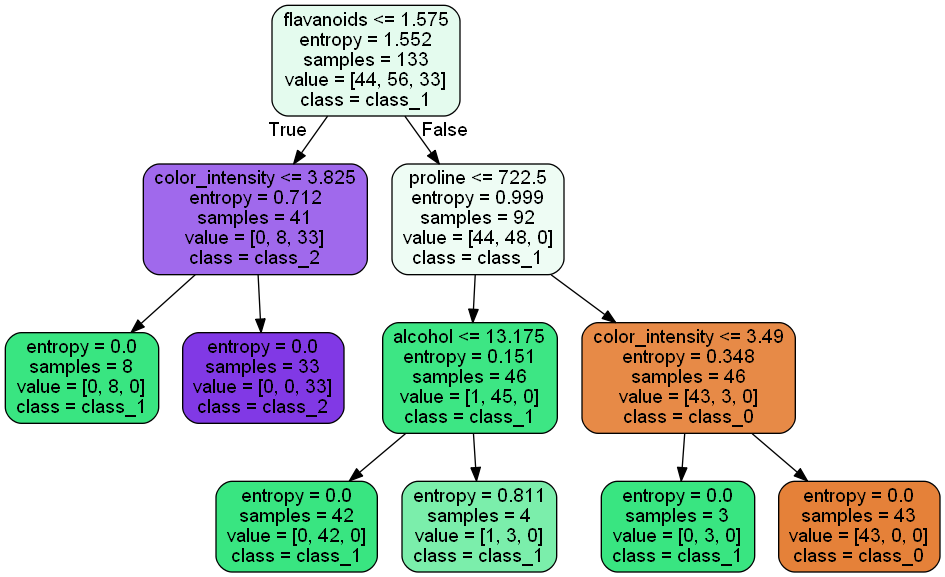

In [13]:
import pydotplus as pdp
from sklearn.tree import export_graphviz
dot_data = export_graphviz(
    clf, 
    filled=True,
    rounded=True,
    class_names=wine.target_names,
    feature_names=wine.feature_names,
    out_file=None)
graph = pdp.graph_from_dot_data(dot_data)

from IPython.display import display, Image
display(Image(graph.create_png()))